In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import RFE, RFECV

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, auc, roc_curve

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Load data

In [2]:
def get_data():
    columns = np.load("data/data_columns.npy")
    X = np.load("data/data_valence_physio_with_pupil_for_svm_only_valid_session.npy")
    Y = np.load("data/data_valence_label_with_pupil_for_svm_only_valid_session.npy")
    return pd.DataFrame(X, columns=columns), pd.DataFrame(Y)

In [3]:
X, Y = get_data()
#X = X.drop(["SKT_mean_abs_diff", "SKT_std"], axis=1)
print X.shape, Y.shape

(82400, 25) (82400, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f6674fd0>]],
      dtype=object)

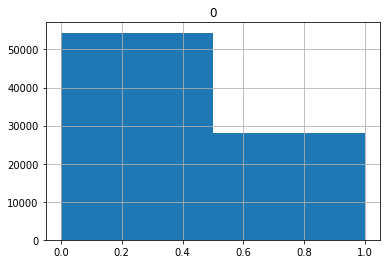

In [4]:
# binarize the problem
Y[Y<=4] = 0
Y[Y>=5] = 1

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

In [6]:
classifiers = {
# 'Gaussian Process': GaussianProcessClassifier(1.0 * RBF(1.0)), 
 'Decision Tree': DecisionTreeClassifier(random_state=seed), 
 'QDA': QuadraticDiscriminantAnalysis(), 
 'Naive Bayes': GaussianNB(), 
 'Linear SVM': SVC(kernel="linear", C=0.025, random_state=seed), 
 'Neural Net': MLPClassifier(alpha=1, max_iter=1000, random_state=seed), 
 'RBF SVM': SVC(gamma=2, C=1, random_state=seed), 
 'AdaBoost': AdaBoostClassifier(random_state=seed), 
 'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=seed), 
 'Nearest Neighbors': KNeighborsClassifier(3)
}

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=42)

# iterate over classifiers
for name, clf in classifiers.items():
    results = cross_val_score(clf, X, Y.values.ravel(), cv=stratified_cv, scoring='roc_auc', verbose=0)
    print("%s - Accuracy: %.2f%% (%.2f%%)" % (name, results.mean()*100, results.std()*100))

AdaBoost - Accuracy: 76.82% (0.36%)
Decision Tree - Accuracy: 99.27% (0.04%)
Random Forest - Accuracy: 81.05% (0.71%)
Nearest Neighbors - Accuracy: 100.00% (0.00%)
QDA - Accuracy: 85.64% (0.27%)
Naive Bayes - Accuracy: 62.02% (0.49%)
Linear SVM - Accuracy: 60.95% (0.47%)
Neural Net - Accuracy: 76.26% (0.43%)
RBF SVM - Accuracy: 100.00% (0.00%)
